Experimenting with Number of Weak Learners (n_estimators)

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('../data/spambase_augmented.csv')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('df shape : ' , df.shape)
print('X shape : ' , X.shape)
print('y shape : ', y.shape)
results = {}

df shape :  (4600, 1186)
X shape :  (4600, 1185)
y shape :  (4600,)


n_estimators in [10,50,100,200,500]

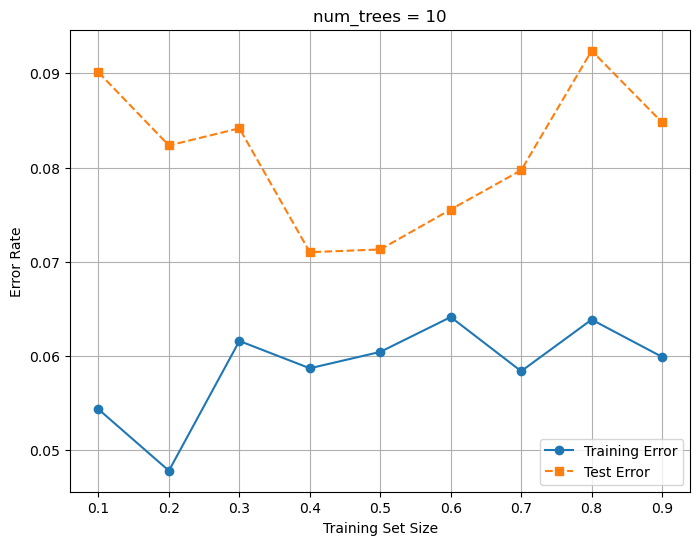

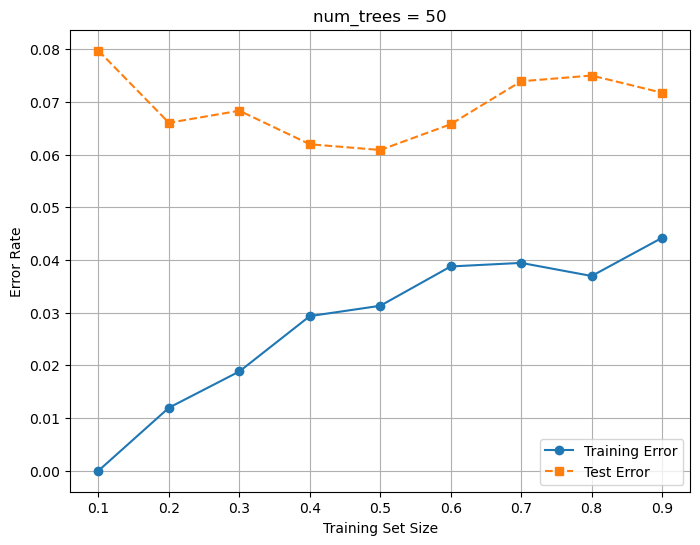

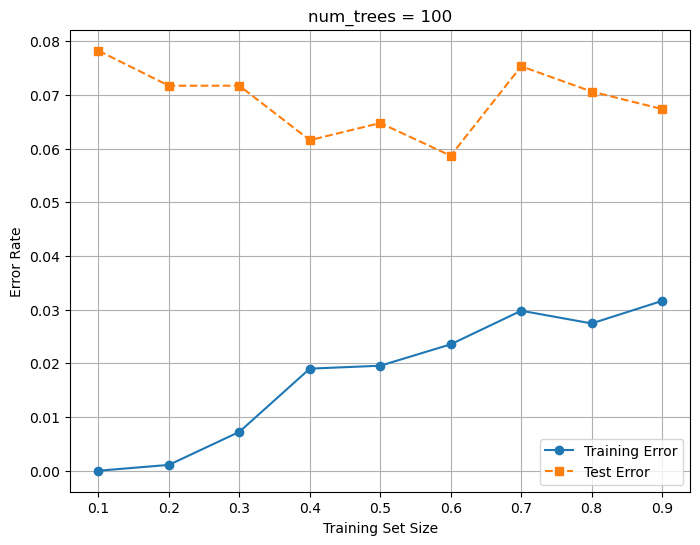

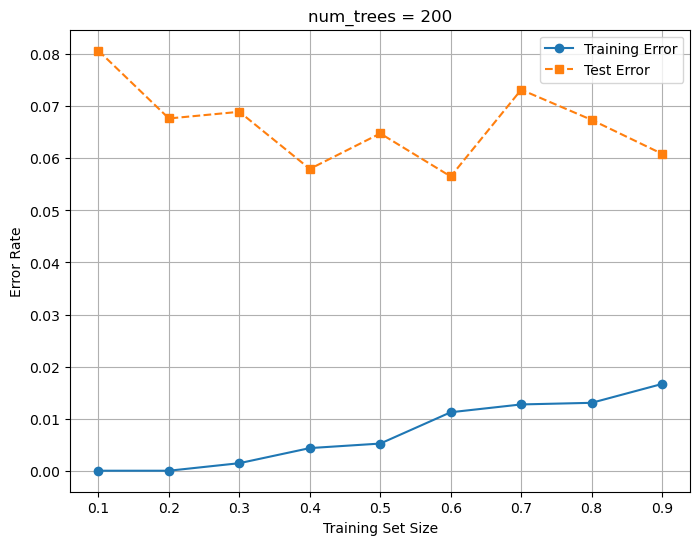

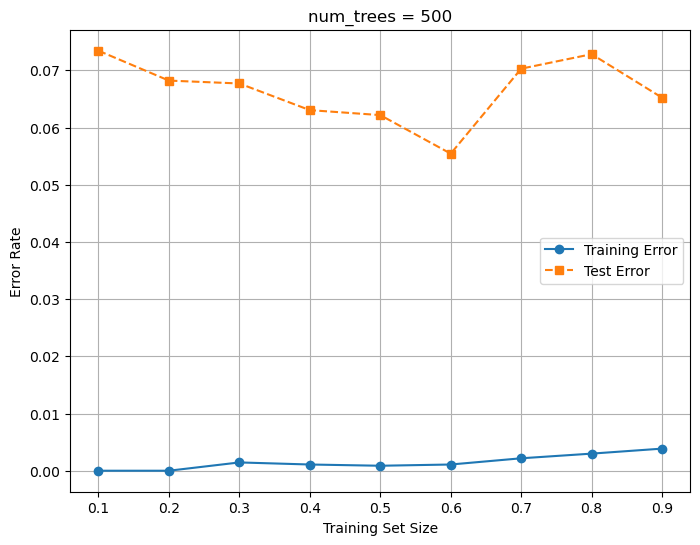

In [4]:
warnings.filterwarnings("ignore")
n_estimators = [10,50,100,200,500]
train_error = []
test_error = []
train_sizes = np.linspace(0.1, 0.9, 9)

for n_estimator in n_estimators:
    train_error = []
    test_error = []
    for train_size in train_sizes:
        X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=train_size,random_state=42)
        clf = AdaBoostClassifier(n_estimators=n_estimator)
        clf.fit(X_train,y_train)

        #train error
        y_train_pred = clf.predict(X_train)
        cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

        # Compute test error
        y_test_pred = clf.predict(X_test)
        cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

        train_error.append(cur_training_err)
        test_error.append(cur_test_error)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_error, label="Training Error", marker='o', linestyle='-')
    plt.plot(train_sizes, test_error, label="Test Error ", marker='s', linestyle='--')
    plt.xlabel("Training Set Size")
    plt.ylabel("Error Rate")    
    plt.title(f"num_trees = {n_estimator}")
    plt.legend()
    plt.grid(True)
    plt.show()
    results[n_estimator] = [train_error,test_error]

In [5]:
print(results)

{10: [[0.05434782608695654, 0.047826086956521685, 0.061594202898550776, 0.05869565217391304, 0.060434782608695614, 0.06413043478260871, 0.05838509316770191, 0.06385869565217395, 0.05990338164251208], [0.09009661835748795, 0.08233695652173911, 0.08416149068322987, 0.07101449275362315, 0.07130434782608697, 0.0755434782608696, 0.07971014492753625, 0.09239130434782605, 0.08478260869565213]], 50: [[0.0, 0.011956521739130421, 0.018840579710144967, 0.02934782608695652, 0.03130434782608693, 0.038768115942029, 0.03944099378881982, 0.036956521739130443, 0.04420289855072468], [0.07971014492753625, 0.0660326086956522, 0.06832298136645965, 0.061956521739130466, 0.060869565217391286, 0.06576086956521743, 0.07391304347826089, 0.07499999999999996, 0.07173913043478264]], 100: [[0.0, 0.0010869565217391797, 0.007246376811594235, 0.01902173913043481, 0.019565217391304346, 0.023550724637681153, 0.029813664596273326, 0.027445652173913038, 0.03164251207729474], [0.07826086956521738, 0.07173913043478264, 0.07

In [6]:
for k,v in results.items():
    print(f"num trees = {k} : ")
    print(f"training error : {v[0]}")
    print(f"test error : {v[1]}")
    print('----------------')

num trees = 10 : 
training error : [0.05434782608695654, 0.047826086956521685, 0.061594202898550776, 0.05869565217391304, 0.060434782608695614, 0.06413043478260871, 0.05838509316770191, 0.06385869565217395, 0.05990338164251208]
test error : [0.09009661835748795, 0.08233695652173911, 0.08416149068322987, 0.07101449275362315, 0.07130434782608697, 0.0755434782608696, 0.07971014492753625, 0.09239130434782605, 0.08478260869565213]
----------------
num trees = 50 : 
training error : [0.0, 0.011956521739130421, 0.018840579710144967, 0.02934782608695652, 0.03130434782608693, 0.038768115942029, 0.03944099378881982, 0.036956521739130443, 0.04420289855072468]
test error : [0.07971014492753625, 0.0660326086956522, 0.06832298136645965, 0.061956521739130466, 0.060869565217391286, 0.06576086956521743, 0.07391304347826089, 0.07499999999999996, 0.07173913043478264]
----------------
num trees = 100 : 
training error : [0.0, 0.0010869565217391797, 0.007246376811594235, 0.01902173913043481, 0.019565217391